In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
test_df = pd.read_csv('../data/interim/test.csv')
train_df = pd.read_csv('../data/interim/train.csv')

Check the other features with missing values

In [30]:
from houses_price.utils.utils import check_dup_null 

In [150]:
dataframes = {
    'Train': train_df,
    'Test': test_df
}
null_dfs = check_dup_null(dataframes)

The Train has 0 duplicates
The Train has 0 null values
The Test has 0 duplicates
The Test has 22 null values


In [87]:
null_train_df = null_dfs['Train']
null_train_df[(null_train_df['Null_percent'] > 0)]

,Total,Null_percent
GarageYrBlt,81,5.551748
GarageQual,81,5.551748
GarageCond,81,5.551748
GarageType,81,5.551748
GarageFinish,81,5.551748
BsmtFinType2,38,2.604524
BsmtExposure,38,2.604524
BsmtQual,37,2.535984
BsmtCond,37,2.535984
BsmtFinType1,37,2.535984


Since electrical have only a null value, I'm gonna drop this.

In [85]:
train_df = train_df.dropna(subset=['Electrical'])

Let see how are correlated the other features

In [113]:
features_to_drop = list(null_train_df[(null_train_df['Null_percent'] > 0)].index)

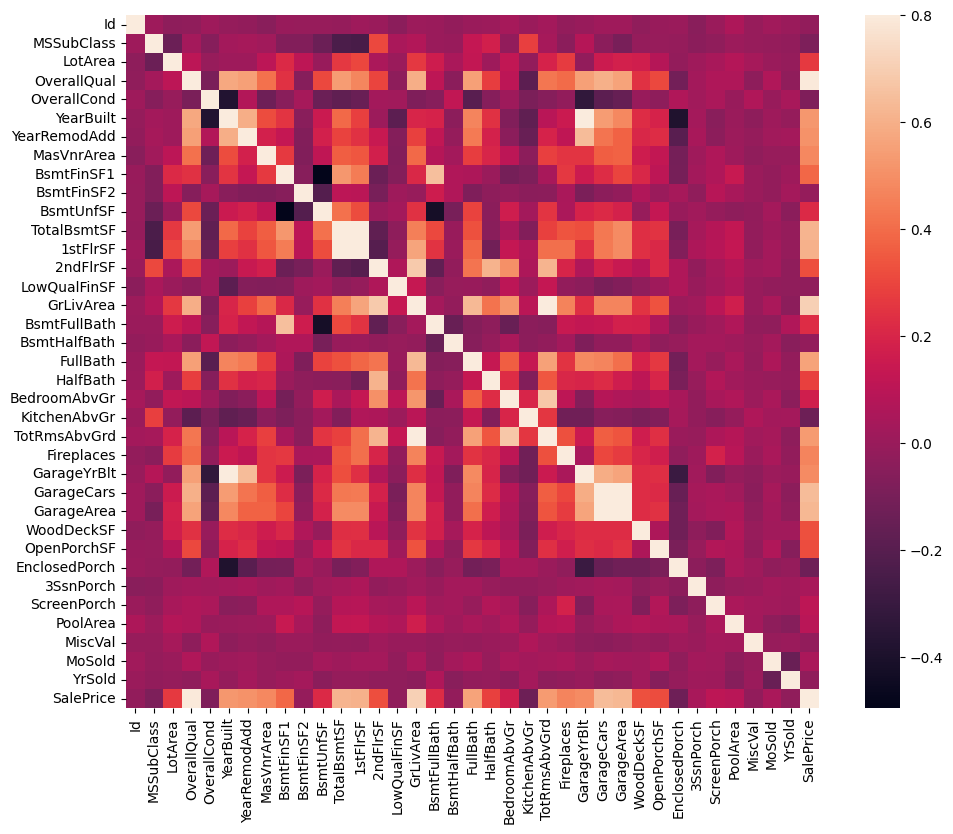

In [139]:
corrmat = train_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Since the "GarageX" variables have the same number of missing data, probably refers of the same set of observations and are strong correlated with GarageCars, I'll delete this features. Same with BsmtX. 

Check MasVnrArea

In [148]:
train_df.corr(numeric_only=True)['MasVnrArea'].sort_values(ascending=False).head(10)

MasVnrArea      1.000000
SalePrice       0.477486
OverallQual     0.411699
GrLivArea       0.390818
GarageArea      0.372990
GarageCars      0.364381
TotalBsmtSF     0.363667
1stFlrSF        0.344255
YearBuilt       0.316345
TotRmsAbvGrd    0.280839
Name: MasVnrArea, dtype: float64

Since the missing data is only the 0.5% I'll drop the null values. I am going to conserve the feature, because have strong correlation with SalePrice